# Graphical Models

$
\newcommand{\x}{\mathbf{x}}
\newcommand{\y}{\mathbf{y}}
$

In this lab, we implement a Markov Random Field to denoise a binary image. 

| | |
|--|--|
| **Names** | *Thomas Brus & Jan Ubbo van Baardewijk* |
| **Group** | *ML_HMI_01* |


163 253


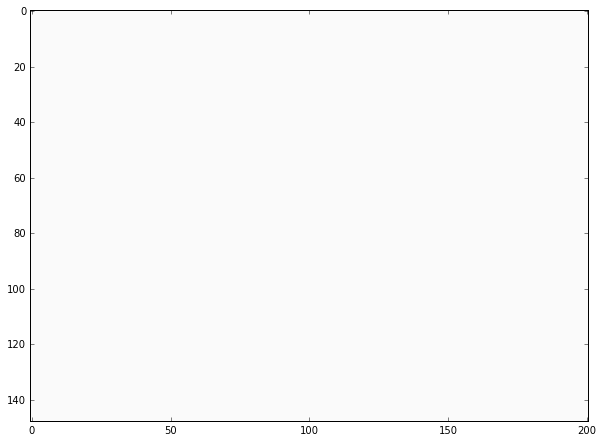

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import scipy.ndimage as ndim
import matplotlib.pyplot as plt
import operator
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Read in the data:
im = ndim.imread("figure.png")[3:-3,3:-3]-1 # Remove the bor
im = -1 + 2*im

print im.min(), im.max()
plt.imshow(im,cmap="bone")

def corrupt(im,pFlip = 50):  # Flip one in [pFlip] pixels 
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            if np.random.randint(pFlip):
                im[r,c] = -im[r,c]


## Markov Random Fields


We do this by iteratively minimizing the energy function defined below. 

Note that the image as it has been loaded above is in the form of a matrix, which allows us to keep track of neighbouring pixels.

So, first of all, we corrupt our image with 20% noise. You can change this amount later, and play with different levels of noise.

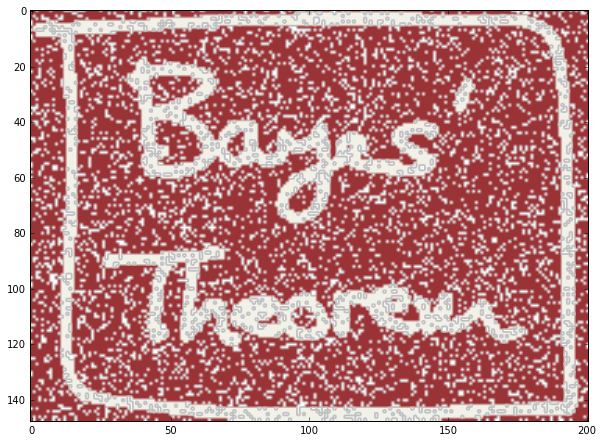

In [3]:
# This code is given

X = im.copy()
corrupt(X, 5)
plt.imshow(X, cmap="bone")

## Defining the energy function

The energy function of the original image $\x$ and the reconstructed image $\y$ is given by
$$
E(\x,\y) = h\sum_i x_i -\beta \sum_{i,j} x_i,x_j - \eta\sum_i x_iy_i
$$

**Question 1 [5 marks]** Implement a function `energy(h,beta,eta,x,y)` that computes the energy of the model, for a given set of parameters $h,\beta,\eta$ and image and reconstruction matrices $\x, \y$.

In [10]:
# Answer to Q1

def energy(h, beta, eta, x, y):
    return h * sum([xi - beta for xi in x]) * sum([sum([xi * xj - eta for xj in x]) for xi in x]) * sum([xi * xj for xi, xj in zip(x, y)])

# Example
# print energy(1.0, 1.0, 1.0, X.flatten(), X.flatten())
energy(1.0, 1.0, 1.0, [1, 2, 3], [4, 5, 6])

2592.0

The energy defined above allows us to compute the change in energy resulting from flipping a single pixel. The function `deltaE` defined below provides us with this computation. 

**Question 2 [5 marks]** What is the computational complexity of this function, in terms of the number of pixels in the image?

In [ ]:
# Answer to Q2

# TODO: Add explanation
O(N) = N + N^2 + N

In [ ]:
# This code is given

def deltaE(h, beta, eta, X, Y, r, c):
    v = Y[r,c]
    Y[r, c] = 1 - v
    E = energy(h, beta, eta, X, Y)
    Y[r, c] = v
    return E - energy(h, beta, eta, X, Y)


**Question 3 [5 marks]** Can you figure out a more efficient way of implementing `deltaE`? What is the computational complexity of your solution?


In [73]:
# Answer to Q3



**Question 4 [5 marks]** Implement repeatedly iterating through all the pixels of the image, and flipping the pixels of the reconstruction $\y$ if that change results in a negative deltaE. 

In [1]:
# Answer to Q4

h = 1.
beta = 1.
eta = 1.


**Question 5 [5 marks]** What is the computational complexity of the complete algorithm, with the original implementation of `deltaE`, and with your new implementation?

Answer to Q5

**Question 6 [20 marks]** From the original image, can you decide on the optimal values for $h,\beta$ and $\eta$? Explain your thought process, and what you can tell from knowing the original image. 

Answer to Q6

**Question 7 [5 marks]** How can you evaluate the quality of the result? Implement your form of evaluation. Use this to evaluate your choice of $h,\beta,\eta$. What are the best values of the parameters you can find? Do they correspond to what you had expected?

Answer to Q7